<div style='text-align: center;'>
<h1>English Premier League Data Analysis</h1>
</div>
An EDA project that analyses the data of English Premier League of seasons 2020-21 and 2021-22.


---

<div style='text-align: justify;'>
This EDA project consists of the dataset of English Premier League of season 2020-2021 and 2021-2022. The dataset provides various
data of the match. 
</div>

<div style='text-align: justify'>
The major changes made to the original dataset are:
<ol>
<li>The data's related to the seasons 2020-21(2021) and 2021-22(2022) are taken for the project
<li>Seven columns are dropped that are irrelevant for the project, namely 'undefined'(improper index), 'comp'(the column described what
  competition is the game is from, but as all games considered here are from the EPL, it is irrelevant), 'notes'(blank column), 'match
  report'(blank column), 'fk'(the data was inaccurate), 'attendance'(Too many missing data), 'Week'('Unnecessary and inaccurate data').
<li>The raw data that was provided was in .csv format which has poor datatype handling, so the file data was further stored and analysed
  using .xlsx(Excel) format.
<li>The encryption is also changed to UTF-8 to incorporate special symbols in names.
</div>
The final dataframe after necessary changes had 20 columns and 1520 records excluding header row.



<i>Imports</i>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

The dataframe is accessed by the variable 'df'

In [46]:
df = pd.read_excel('PL_matches_cpy.xlsx')

Checking for null values

In [47]:
# print(df[df.isnull().any(axis=1)])

Only one null value is detected. It is then filled with mean value of the similar criterias

In [48]:
# fil_df = df[(df['Home_Team'] == 'Crystal Palace') & (df['Season'] == 2021)]
# medianfil=fil_df['Avg_Shot_Dist_Home'].median()
# df.loc[(df['Home_Team']=='Crystal Palace') & (df['Season']==2021) & (df['Avg_Shot_Dist_Home'].isnull()),'Avg_Shot_Dist_Home'] = medianfil
# print(df[df.isnull().any(axis=1)])

Changing the names of columns for better readability

In [49]:
# oldcolnames = df.columns.tolist()
# print(oldcolnames) 
# newcolnames = ['Date','Time','Day','Venue','Result','Goals_Home','Goals_Away','Opp_Team','Exp_Goal_Home','Exp_Goal_Opp',
#                'Posession_Home','Captain_Home','Formation','Referee','Shots_Home','Shots_On_Target_Home',
#                'Avg_Shot_Dist_Home','Penalty_Home','Penalty_Opp','Season','Home_Team']
# renameDict = dict(zip(oldcolnames,newcolnames))
# print(renameDict)
# df.rename(columns=renameDict,inplace=True)
# print(df.head())

Rearranging the columns of the dataset

In [50]:
# new_col_order = ['Date','Time','Day','Home_Team','Opp_Team','Result','Goals_Home','Goals_Away','Exp_Goal_Home','Exp_Goal_Opp',
#                'Shots_Home','Shots_On_Target_Home','Avg_Shot_Dist_Home','Posession_Home','Penalty_Home','Penalty_Opp','Formation',
#                'Captain_Home','Referee','Venue','Season']
# df = df[new_col_order]
# print(df.head())

Cleaning the 'Time' column

In [51]:
# df['Time']=df['Time'].str.split('(',n=1,expand=True)[0].str.strip()

Setting the proper datatypes for each columns

In [52]:
# print(df.dtypes)

Merging the columns 'Date' and 'Time' to 'DateTime', and converting them into datetime format instead of object

In [53]:
# df['DateTime'] = df['Date'] + ' ' + df['Time']
# df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')
# df = df.drop(columns=['Date', 'Time'])
# print(df.head())
# print(df.dtypes)

Repositioning the 'Datetime' column to the first column

In [54]:
# new_col_order = ['DateTime','Day','Home_Team','Opp_Team','Result','Goals_Home','Goals_Away','Exp_Goal_Home','Exp_Goal_Opp',
#                'Shots_Home','Shots_On_Target_Home','Avg_Shot_Dist_Home','Posession_Home','Penalty_Home','Penalty_Opp','Formation',
#                'Captain_Home','Referee','Venue','Season']
# df= df[new_col_order]
# print(df.head())

Sorting the data according to the match dates, then time, then aplhabetically according to the home team.

In [55]:
# df=df.sort_values(by=['DateTime','Home_Team'])
# print(df.head())

Saving the modifications done on the original dataset

In [56]:
# Saving the modifications done on the original dataset
# df.to_excel('PL_matches_cpy2.xlsx', index=False)
# df.to_excel('PL_matches_cpy.xlsx', index=False) # This is a copy that is generated in case of corruption of original saved file

The dataframe df is further broken down into smaller dataframes based on season and venue(Every match has 2 record, one with the home teams perspective and the other as the away teams perspective)

In [57]:
df_22=df[df['Season']==2022]
df_21=df[df['Season']==2021]

Home_df_22=df_22[df_22['Venue']=='Home']
Away_df_22=df_22[df_22['Venue']=='Away']
Home_df_21=df_21[df_21['Venue']=='Home']
Away_df_21=df_21[df_21['Venue']=='Away']


<b>The dataset is now ready for analysis<b>

# Questions
1. What are the total no. of goals scored by each teams in each seasons? Represent this data graphically using suitable plot after arranging the data in descending order

                        Team  Total_Goals
1            Manchester City           58
2                  Liverpool           49
3          Tottenham Hotspur           38
4                    Chelsea           37
5                    Arsenal           35
6             Leicester City           34
7            West Ham United           33
8          Manchester United           32
9                Aston Villa           29
10            Crystal Palace           27
11                   Everton           27
12          Newcastle United           26
13               Southampton           23
14                 Brentford           22
15   Wolverhampton Wanderers           20
16              Leeds United           19
17  Brighton and Hove Albion           19
18                   Burnley           18
19                   Watford           17
20              Norwich City           12


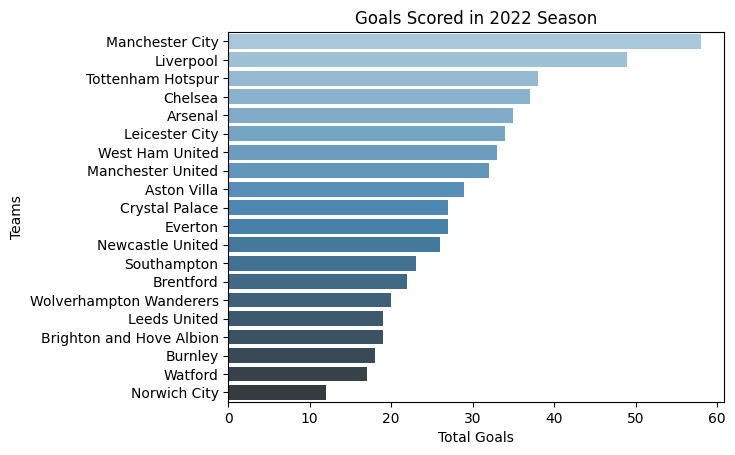

In [58]:
goals_22=Home_df_22.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
goals_22.rename(columns={'Ref_Team': 'Team', 'Goals_Ref': 'Total_Goals'}, inplace=True)
goals_22.sort_values(by='Total_Goals',ascending=False,inplace=True)
goals_22.index=range(1,len(goals_22)+1) # type:ignore
print(goals_22)


sns.barplot(data=goals_22,x='Total_Goals',y='Team',hue='Team',palette='Blues_d')
plt.xlabel('Total Goals')
plt.ylabel('Teams')
plt.title('Goals Scored in 2022 Season')
plt.show()

                        Team  Total_Goals
1            Manchester City           43
2          Manchester United           38
3          Tottenham Hotspur           35
4             Leicester City           34
5            West Ham United           32
6                    Chelsea           31
7                  Liverpool           29
8                Aston Villa           29
9                Southampton           28
10              Leeds United           28
11          Newcastle United           26
12                   Arsenal           24
13                   Everton           24
14  Brighton and Hove Albion           22
15   Wolverhampton Wanderers           21
16            Crystal Palace           20
17      West Bromwich Albion           15
18                   Burnley           14
19          Sheffield United           12
20                    Fulham            9


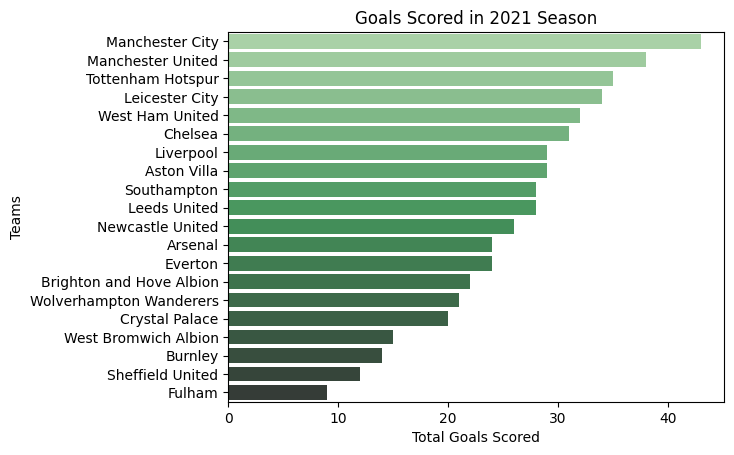

In [59]:
goals_21=Home_df_21.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
goals_21.rename(columns={'Ref_Team': 'Team', 'Goals_Ref': 'Total_Goals'}, inplace=True)
goals_21.sort_values(by='Total_Goals',ascending=False,inplace=True)
goals_21.index=range(1,len(goals_21)+1) #type: ignore
print(goals_21)

sns.barplot(data=goals_21,x='Total_Goals',y='Team',hue='Team',palette='Greens_d')
plt.xlabel('Total Goals Scored')
plt.ylabel('Teams')
plt.title('Goals Scored in 2021 Season')
plt.show()

2. Calculate the final point standings based on the points calculation criteria. Who won the Premier League each season? Show all the columns used for point calculation.

In [60]:
stats21=df_21.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
results21=df_21.pivot_table(index='Ref_Team',columns='Result', aggfunc='size')
match_count_21=df_21.groupby('Ref_Team').size().reset_index(name='Matches') #type: ignore
stats21=stats21.merge(results21,on='Ref_Team').merge(match_count_21,on='Ref_Team')
stats21['Points'] = (stats21['W']*3)+stats21['D']
stats21.sort_values(by='Points', inplace=True, ascending=False)
stats21.rename(columns={'Ref_Team':'Team','Goals_Ref':'Goals','W':'Win','D':'Draw','L':'Loss'},inplace=True)
stats21=stats21[['Team','Matches','Win','Loss','Draw','Goals','Points']]
print("Premier League 2020-2021 Team Statistics:")
print(stats21.to_string(index=False))
winner=stats21['Team'].iloc[0]
print('\n',winner,"is the PL winner")

Premier League 2020-2021 Team Statistics:
                    Team  Matches  Win  Loss  Draw  Goals  Points
         Manchester City       38   27     6     5     83      86
       Manchester United       38   21     6    11     73      74
               Liverpool       38   20     9     9     68      69
                 Chelsea       38   19     9    10     58      67
          Leicester City       38   20    12     6     68      66
         West Ham United       38   19    11     8     62      65
       Tottenham Hotspur       38   18    12     8     68      62
                 Arsenal       38   18    13     7     55      61
            Leeds United       38   18    15     5     62      59
                 Everton       38   17    13     8     47      59
             Aston Villa       38   16    15     7     55      55
        Newcastle United       38   12    17     9     46      45
 Wolverhampton Wanderers       38   12    17     9     36      45
          Crystal Palace       38 

In [61]:
stats22=df_22.groupby('Ref_Team')['Goals_Ref'].sum().reset_index()
results22=df_22.pivot_table(index='Ref_Team',columns='Result', aggfunc='size')
match_count_22=df_22.groupby('Ref_Team').size().reset_index(name='Matches') #type: ignore
stats22=stats22.merge(results22,on='Ref_Team').merge(match_count_22,on='Ref_Team')
stats22['Points'] = (stats22['W']*3)+stats22['D']
stats22.sort_values(by='Points', inplace=True, ascending=False)
stats22.rename(columns={'Ref_Team':'Team','Goals_Ref':'Goals','W':'Win','D':'Draw','L':'Loss'},inplace=True)
stats22=stats22[['Team','Matches','Win','Loss','Draw','Goals','Points']]
print("Premier League 2021-2022 Team Statistics:")
print(stats22.to_string(index=False))
winner=stats21['Team'].iloc[0]
print('\n',winner,"is the PL winner")

Premier League 2021-2022 Team Statistics:
                    Team  Matches  Win  Loss  Draw  Goals  Points
         Manchester City       38   29     3     6     99      93
               Liverpool       38   28     2     8     94      92
                 Chelsea       38   21     6    11     76      74
       Tottenham Hotspur       38   22    11     5     69      71
                 Arsenal       38   22    13     3     61      69
       Manchester United       38   16    12    10     57      58
         West Ham United       38   16    14     8     60      56
          Leicester City       38   14    14    10     62      52
Brighton and Hove Albion       38   12    11    15     42      51
 Wolverhampton Wanderers       38   15    17     6     38      51
        Newcastle United       38   13    15    10     44      49
          Crystal Palace       38   11    12    15     50      48
               Brentford       38   13    18     7     48      46
             Aston Villa       38 

3. What are the variation statistics between the expected v/s actual values of different columns given. Also which teams show the maximum and minimum deviation from these expected values?

Season 2020-2021

In [62]:
df_21_devs=df_21[['Ref_Team','Opp_Team','Goals_Ref','Goals_Opp','Exp_Goal_Ref','Exp_Goal_Opp']].copy()
df_21_devs['Dev_Ref']=df_21_devs['Goals_Ref'] - df_21_devs['Exp_Goal_Ref']
df_21_devs['Dev_Opp']=df_21_devs['Goals_Opp'] - df_21_devs['Exp_Goal_Opp']
avg_devs_21=df_21_devs.groupby('Ref_Team').agg({
    'Dev_Ref': 'mean',
    'Dev_Opp': 'mean'
}).reset_index()
avg_devs_21.columns=['Team', 'Mean_Deviation_Goals_Ref', 'Mean_Deviation_Goals_Away']
mean_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].mean()
std_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].std()
min_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].min()
max_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].max()
median_deviation_ref = avg_devs_21['Mean_Deviation_Goals_Ref'].median()

mean_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].mean()
std_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].std()
min_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].min()
max_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].max()
median_deviation_away = avg_devs_21['Mean_Deviation_Goals_Away'].median()

print("Deviation Statistics for Actual Goals vs. Expected Goals for home team")
print(f"Mean: {mean_deviation_ref}")
print(f"Standard Deviation: {std_deviation_ref}")
print(f"Minimum: {min_deviation_ref}")
print(f"Maximum: {max_deviation_ref}")
print(f"Median: {median_deviation_ref}")

print("\nDeviation Statistics for Actual Goals vs. Expected Goals for away team")
print(f"Mean: {mean_deviation_away}")
print(f"Standard Deviation: {std_deviation_away}")
print(f"Minimum: {min_deviation_away}")
print(f"Maximum: {max_deviation_away}")
print(f"Median: {median_deviation_away}")

Deviation Statistics for Actual Goals vs. Expected Goals for home team
Mean: 0.05223684210526316
Standard Deviation: 0.22569856404876718
Minimum: -0.3605263157894737
Maximum: 0.3868421052631579
Median: 0.0618421052631579

Deviation Statistics for Actual Goals vs. Expected Goals for away team
Mean: 0.05223684210526315
Standard Deviation: 0.14080474714574875
Minimum: -0.1394736842105263
Maximum: 0.39210526315789473
Median: 0.03289473684210526


In [63]:
max_deviation_team_ref = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Ref'].idxmax()]
min_deviation_team_ref = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Ref'].idxmin()]
max_deviation_team_away = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Away'].idxmax()]
min_deviation_team_away = avg_devs_21.loc[avg_devs_21['Mean_Deviation_Goals_Away'].idxmin()]

print(f"Team with maximum deviation (Home Goals): {max_deviation_team_ref['Team']} ({max_deviation_team_ref['Mean_Deviation_Goals_Ref']})")
print(f"Team with minimum deviation (Home Goals): {min_deviation_team_ref['Team']} ({min_deviation_team_ref['Mean_Deviation_Goals_Ref']})")
print(f"Team with maximum deviation (Away Goals): {max_deviation_team_away['Team']} ({max_deviation_team_away['Mean_Deviation_Goals_Away']})")
print(f"Team with minimum deviation (Away Goals): {min_deviation_team_away['Team']} ({min_deviation_team_away['Mean_Deviation_Goals_Away']})")

Team with maximum deviation (Home Goals): Manchester City (0.3868421052631579)
Team with minimum deviation (Home Goals): Fulham (-0.3605263157894737)
Team with maximum deviation (Away Goals): Southampton (0.39210526315789473)
Team with minimum deviation (Away Goals): Aston Villa (-0.1394736842105263)


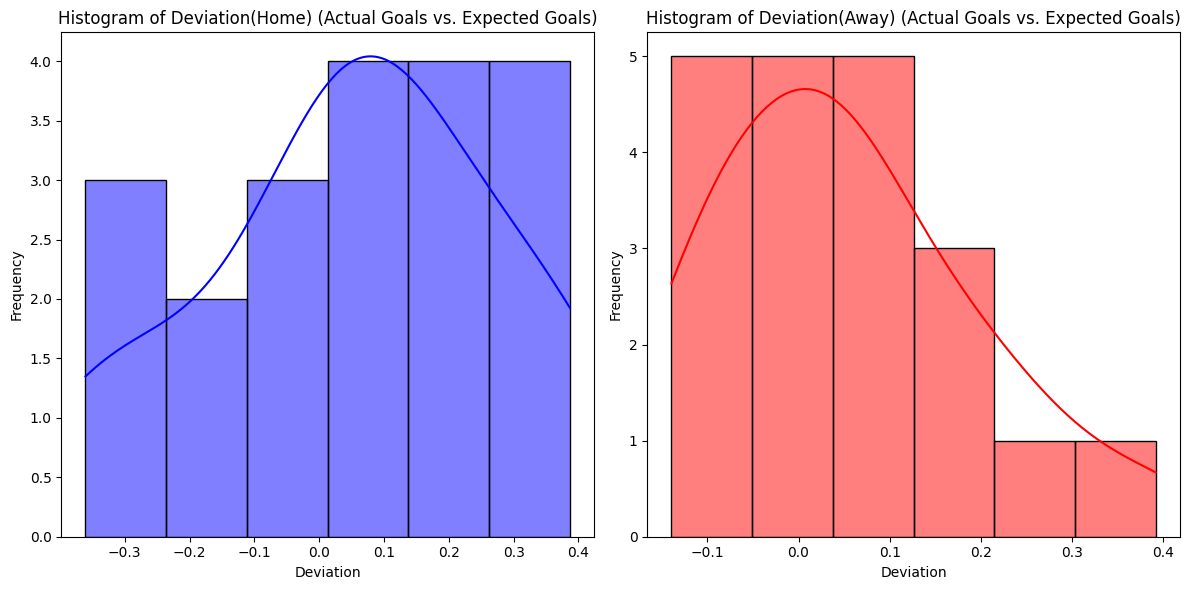

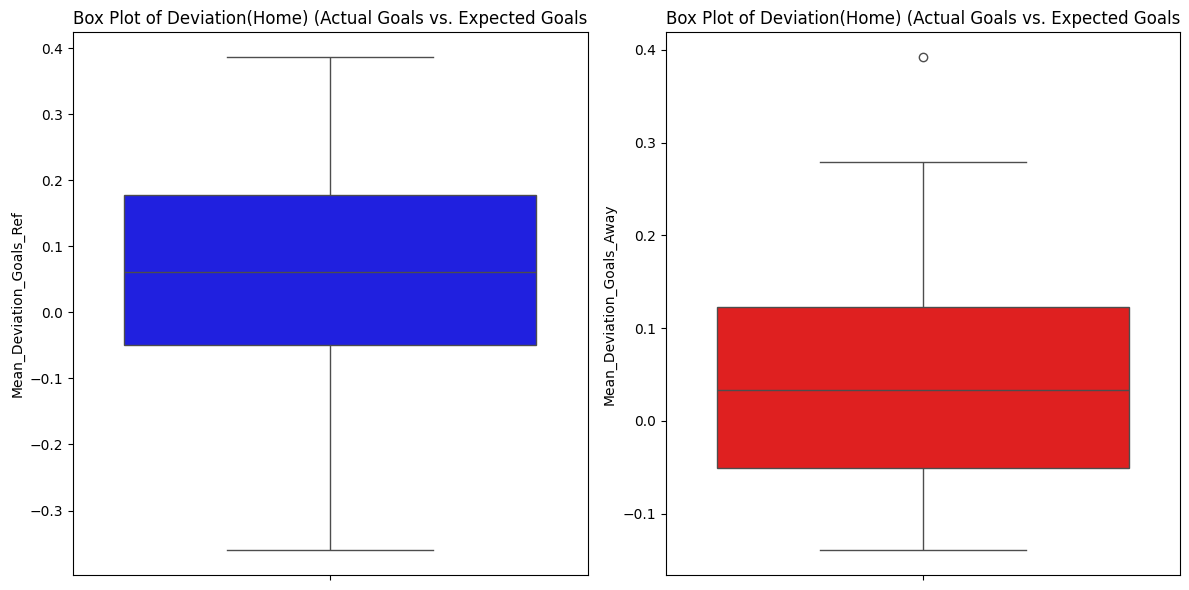

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(avg_devs_21['Mean_Deviation_Goals_Ref'], kde=True, color='blue') # type: ignore
plt.title('Histogram of Deviation(Home) (Actual Goals vs. Expected Goals)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(avg_devs_21['Mean_Deviation_Goals_Away'], kde=True, color='red') # type: ignore
plt.title('Histogram of Deviation(Away) (Actual Goals vs. Expected Goals)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots of deviations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=avg_devs_21['Mean_Deviation_Goals_Ref'], color='blue')
plt.title('Box Plot of Deviation(Home) (Actual Goals vs. Expected Goals')

plt.subplot(1, 2, 2)
sns.boxplot(y=avg_devs_21['Mean_Deviation_Goals_Away'], color='red')
plt.title('Box Plot of Deviation(Home) (Actual Goals vs. Expected Goals')

plt.tight_layout()
plt.show()

Season 2021-2022

In [65]:
df_22_devs=df_22[['Ref_Team','Opp_Team','Goals_Ref','Goals_Opp','Exp_Goal_Ref','Exp_Goal_Opp']].copy()
df_22_devs['Dev_Ref']=df_22_devs['Goals_Ref'] - df_22_devs['Exp_Goal_Ref']
df_22_devs['Dev_Opp']=df_22_devs['Goals_Opp'] - df_22_devs['Exp_Goal_Opp']
avg_devs_22=df_22_devs.groupby('Ref_Team').agg({
    'Dev_Ref': 'mean',
    'Dev_Opp': 'mean'
}).reset_index()
avg_devs_22.columns=['Team', 'Mean_Deviation_Goals_Ref', 'Mean_Deviation_Goals_Away']
mean_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].mean()
std_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].std()
min_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].min()
max_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].max()
median_deviation_ref = avg_devs_22['Mean_Deviation_Goals_Ref'].median()

mean_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].mean()
std_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].std()
min_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].min()
max_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].max()
median_deviation_away = avg_devs_22['Mean_Deviation_Goals_Away'].median()

print("Deviation Statistics for Actual Goals vs. Expected Goals for home team")
print(f"Mean: {mean_deviation_ref}")
print(f"Standard Deviation: {std_deviation_ref}")
print(f"Minimum: {min_deviation_ref}")
print(f"Maximum: {max_deviation_ref}")
print(f"Median: {median_deviation_ref}")

print("\nDeviation Statistics for Actual Goals vs. Expected Goals for away team")
print(f"Mean: {mean_deviation_away}")
print(f"Standard Deviation: {std_deviation_away}")
print(f"Minimum: {min_deviation_away}")
print(f"Maximum: {max_deviation_away}")
print(f"Median: {median_deviation_away}")

Deviation Statistics for Actual Goals vs. Expected Goals for home team
Mean: 0.0706578947368421
Standard Deviation: 0.16911921386933335
Minimum: -0.2473684210526316
Maximum: 0.3631578947368421
Median: 0.05

Deviation Statistics for Actual Goals vs. Expected Goals for away team
Mean: 0.0706578947368421
Standard Deviation: 0.17190449504373478
Minimum: -0.3605263157894737
Maximum: 0.3368421052631579
Median: 0.08421052631578946


In [66]:
max_deviation_team_ref = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Ref'].idxmax()]
min_deviation_team_ref = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Ref'].idxmin()]
max_deviation_team_away = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Away'].idxmax()]
min_deviation_team_away = avg_devs_22.loc[avg_devs_22['Mean_Deviation_Goals_Away'].idxmin()]

print(f"Team with maximum deviation (Home Goals): {max_deviation_team_ref['Team']} ({max_deviation_team_ref['Mean_Deviation_Goals_Ref']})")
print(f"Team with minimum deviation (Home Goals): {min_deviation_team_ref['Team']} ({min_deviation_team_ref['Mean_Deviation_Goals_Ref']})")
print(f"Team with maximum deviation (Away Goals): {max_deviation_team_away['Team']} ({max_deviation_team_away['Mean_Deviation_Goals_Away']})")
print(f"Team with minimum deviation (Away Goals): {min_deviation_team_away['Team']} ({min_deviation_team_away['Mean_Deviation_Goals_Away']})")

Team with maximum deviation (Home Goals): Leicester City (0.3631578947368421)
Team with minimum deviation (Home Goals): Norwich City (-0.2473684210526316)
Team with maximum deviation (Away Goals): Watford (0.3368421052631579)
Team with minimum deviation (Away Goals): Wolverhampton Wanderers (-0.3605263157894737)


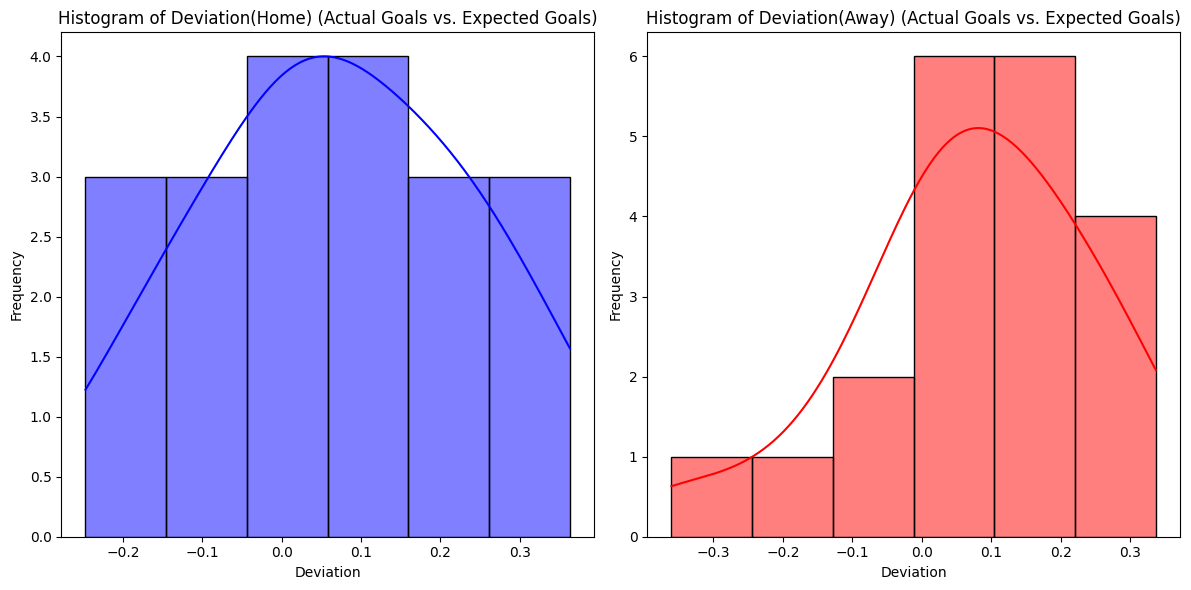

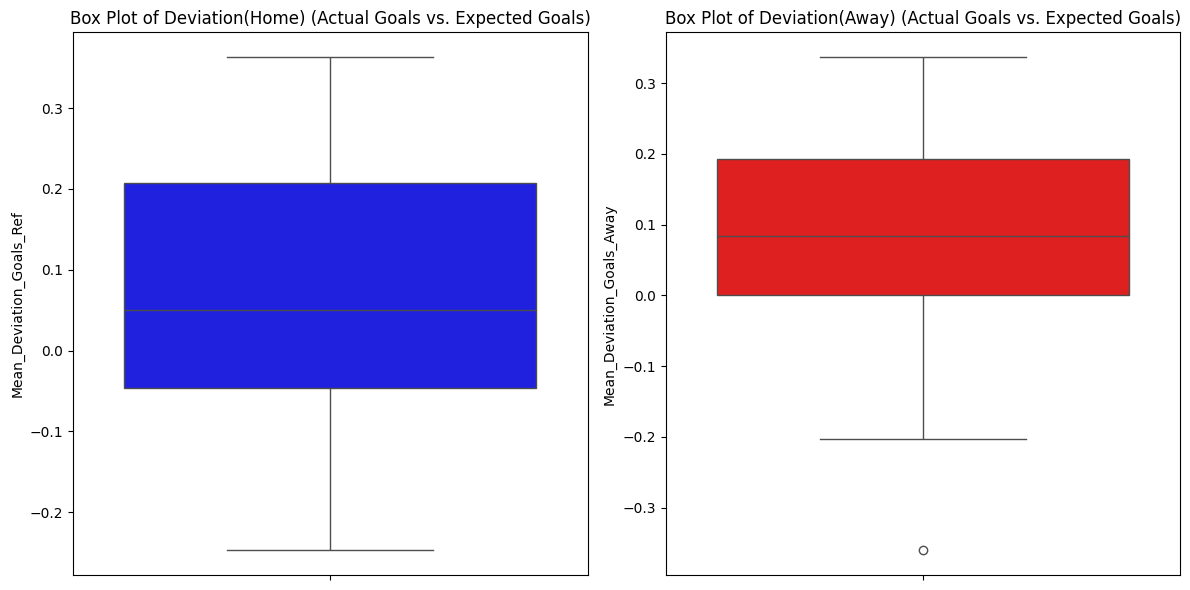

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(avg_devs_22['Mean_Deviation_Goals_Ref'], kde=True, color='blue') # type: ignore
plt.title('Histogram of Deviation(Home) (Actual Goals vs. Expected Goals)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(avg_devs_22['Mean_Deviation_Goals_Away'], kde=True, color='red') # type: ignore
plt.title('Histogram of Deviation(Away) (Actual Goals vs. Expected Goals)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots of deviations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=avg_devs_22['Mean_Deviation_Goals_Ref'], color='blue')
plt.title('Box Plot of Deviation(Home) (Actual Goals vs. Expected Goals)')

plt.subplot(1, 2, 2)
sns.boxplot(y=avg_devs_22['Mean_Deviation_Goals_Away'], color='red')
plt.title('Box Plot of Deviation(Away) (Actual Goals vs. Expected Goals)')

plt.tight_layout()
plt.show()

4. Calculate and find the teams which are relagated from the league each season.

<i>The criteria for point distribution is 3 points for a win and one point for a draw. When the League ends, the last 3 teams are relagated into 2nd Division and the top 3 teams from 2nd division are promoted to Premier League.
</i>

In [68]:
print("Season 2020-2021 relagated teams are:")
print(stats21['Team'].tail(3).to_string(index=False))

Season 2020-2021 relagated teams are:
              Fulham
West Bromwich Albion
    Sheffield United


In [69]:
print("Season 2021-2022 relagated teams are:")
print(stats22['Team'].tail(3).to_string(index=False))

Season 2021-2022 relagated teams are:
     Burnley
     Watford
Norwich City


5. Which are the top 3 candidates for the next seasons Premier League winners based on the 2022 League data? (Consider points, goal difference aggregate, possession aggregate, etc.)

In [70]:
df_22 = df[df['Season'] == 2022].copy()

df_22.loc[:, 'Goal_Difference'] = df_22['Goals_Ref'] - df_22['Goals_Opp']

team_stats = df_22.groupby('Ref_Team').agg({
    'Goals_Ref': 'sum',
    'Goals_Opp': 'sum',
    'Goal_Difference': 'sum',
    'Exp_Goal_Ref': 'sum',
    'Exp_Goal_Opp': 'sum',
    'Shots_On_Target_Ref': 'sum',
    'Posession_Ref': 'mean',
    'Result': lambda x: (x == 'W').sum() * 3 + (x == 'D').sum()
}).reset_index()

team_stats.rename(columns={
    'Ref_Team': 'Team',
    'Goals_Ref': 'Total_Goals_Scored',
    'Goals_Opp': 'Total_Goals_Conceded',
    'Goal_Difference': 'Total_Goal_Difference',
    'Exp_Goal_Ref': 'Total_Expected_Goals',
    'Exp_Goal_Opp': 'Total_Expected_Goals_Against',
    'Shots_On_Target_Ref': 'Total_Shots_On_Target',
    'Posession_Ref': 'Average_Possession',
    'Result': 'Points'
}, inplace=True)

team_stats = team_stats.sort_values(by=['Points', 'Total_Goal_Difference'], ascending=False)
top_candidates = team_stats[['Team', 'Points', 'Total_Goal_Difference', 'Total_Shots_On_Target', 'Average_Possession']].head(3)
print(top_candidates.to_string(index=False))

           Team  Points  Total_Goal_Difference  Total_Shots_On_Target  Average_Possession
Manchester City      93                     73                    237           67.947368
      Liverpool      92                     68                    237           62.657895
        Chelsea      74                     43                    200           61.763158


6. Analyse which teams won most at home, lost most at home, won most away and lost most away

In [71]:
print("Season 2020-2021:")
max_home_wins = Home_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_home_wins.columns = ['Team', 'Home_Wins']
max_home_wins = max_home_wins[max_home_wins['Home_Wins'] == max_home_wins['Home_Wins'].max()]
print("Teams with the most home wins:")
print(max_home_wins.to_string(index=False))


max_home_losses = Home_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_home_losses.columns = ['Team', 'Home_Losses']
max_home_losses = max_home_losses[max_home_losses['Home_Losses'] == max_home_losses['Home_Losses'].max()]
print("\nTeams with the most home losses:")
print(max_home_losses.to_string(index=False))

max_away_wins = Away_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_away_wins.columns = ['Team', 'Away_Wins']
max_away_wins = max_away_wins[max_away_wins['Away_Wins'] == max_away_wins['Away_Wins'].max()]
print("\nTeams with the most away wins:")
print(max_away_wins.to_string(index=False))

max_away_losses = Away_df_21.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_away_losses.columns = ['Team', 'Away_Losses']
max_away_losses = max_away_losses[max_away_losses['Away_Losses'] == max_away_losses['Away_Losses'].max()]
print("\nTeams with the most away losses:")
print(max_away_losses.to_string(index=False))


Season 2020-2021:
Teams with the most home wins:
           Team  Home_Wins
Manchester City         13

Teams with the most home losses:
            Team  Home_Losses
          Fulham           13
Sheffield United           13

Teams with the most away wins:
           Team  Away_Wins
Manchester City         14

Teams with the most away losses:
            Team  Away_Losses
Sheffield United           16


In [72]:
print("Season 2021-2022:")
max_home_wins = Home_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_home_wins.columns = ['Team', 'Home_Wins']
max_home_wins = max_home_wins[max_home_wins['Home_Wins'] == max_home_wins['Home_Wins'].max()]
print("Teams with the most home wins:")
print(max_home_wins.to_string(index=False))

max_home_losses = Home_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_home_losses.columns = ['Team', 'Home_Losses']
max_home_losses = max_home_losses[max_home_losses['Home_Losses'] == max_home_losses['Home_Losses'].max()]
print("\nTeams with the most home losses:")
print(max_home_losses.to_string(index=False))

max_away_wins = Away_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'W').sum()).reset_index()
max_away_wins.columns = ['Team', 'Away_Wins']
max_away_wins = max_away_wins[max_away_wins['Away_Wins'] == max_away_wins['Away_Wins'].max()]
print("\nTeams with the most away wins:")
print(max_away_wins.to_string(index=False))

max_away_losses = Away_df_22.groupby('Ref_Team')['Result'].apply(lambda x: (x == 'L').sum()).reset_index()
max_away_losses.columns = ['Team', 'Away_Losses']
max_away_losses = max_away_losses[max_away_losses['Away_Losses'] == max_away_losses['Away_Losses'].max()]
print("\nTeams with the most away losses:")
print(max_away_losses.to_string(index=False))


Season 2021-2022:
Teams with the most home wins:
           Team  Home_Wins
      Liverpool         15
Manchester City         15

Teams with the most home losses:
   Team  Home_Losses
Watford           15

Teams with the most away wins:
           Team  Away_Wins
Manchester City         14

Teams with the most away losses:
        Team  Away_Losses
     Everton           13
Norwich City           13


7. Do some date-time based analyses of the given data. How many games are played every month? How many per day of the week and how many on hourly basis? Visualize these too

Season 2020-2021:
Matches per month:
     Month  Matches
0  2020-09       28
1  2020-10       34
2  2020-11       36
3  2020-12       57
4  2021-01       50
5  2021-02       52
6  2021-03       33
7  2021-04       39
8  2021-05       51
Matches per day of the week:
Day
Fri     17
Mon     40
Sat    122
Sun    124
Thu     12
Tue     29
Wed     36
Name: count, dtype: int64


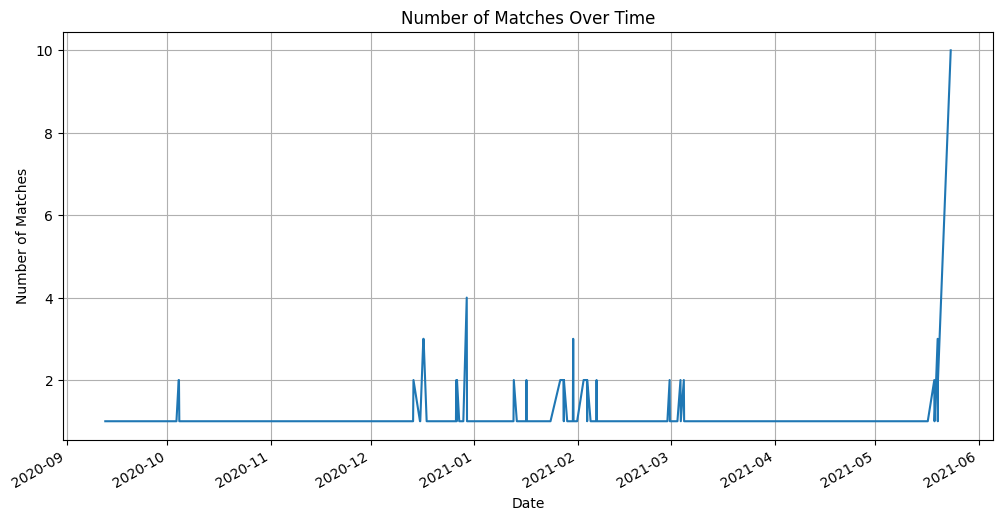

Matches per hour of the day:
Hour
12     55
13      1
14     30
15     35
16     38
17     38
18     43
19     33
20    107
Name: count, dtype: int64


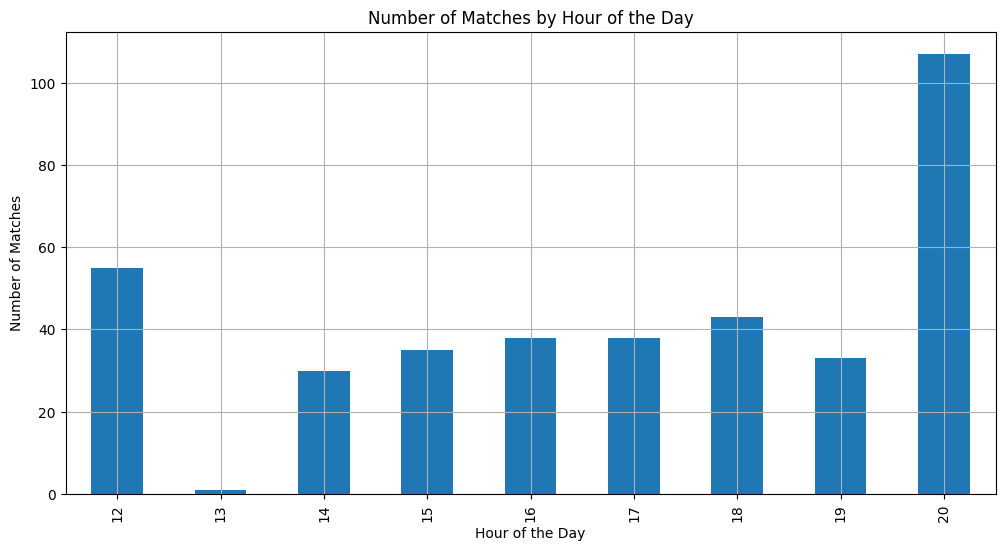

In [73]:
print('Season 2020-2021:')
Home_df_21 = Home_df_21.copy()
Home_df_21['Month'] = Home_df_21['DateTime'].dt.to_period('M')
Home_df_21['Year'] = Home_df_21['DateTime'].dt.year
matches_per_month = Home_df_21.groupby('Month').size().reset_index(name='Matches') # type: ignore
print("Matches per month:")
print(matches_per_month)

matches_per_day = Home_df_21['Day'].value_counts().sort_index()
print("Matches per day of the week:")
print(matches_per_day)

plt.figure(figsize=(12, 6))
Home_df_21.groupby('DateTime').size().plot()
plt.title('Number of Matches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()


Home_df_21['Hour'] = Home_df_21['DateTime'].dt.hour
matches_per_hour = Home_df_21['Hour'].value_counts().sort_index()
print("Matches per hour of the day:")
print(matches_per_hour)

plt.figure(figsize=(12, 6))
matches_per_hour.plot(kind='bar')
plt.title('Number of Matches by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()


Season 2021-2022:
Matches per month:
     Month  Matches
0  2021-08       30
1  2021-09       30
2  2021-10       39
3  2021-11       32
4  2021-12       52
5  2022-01       31
6  2022-02       42
7  2022-03       32
8  2022-04       50
9  2022-05       42
Matches per day of the week:
Day
Fri     10
Mon     14
Sat    173
Sun    114
Thu     19
Tue     18
Wed     32
Name: count, dtype: int64


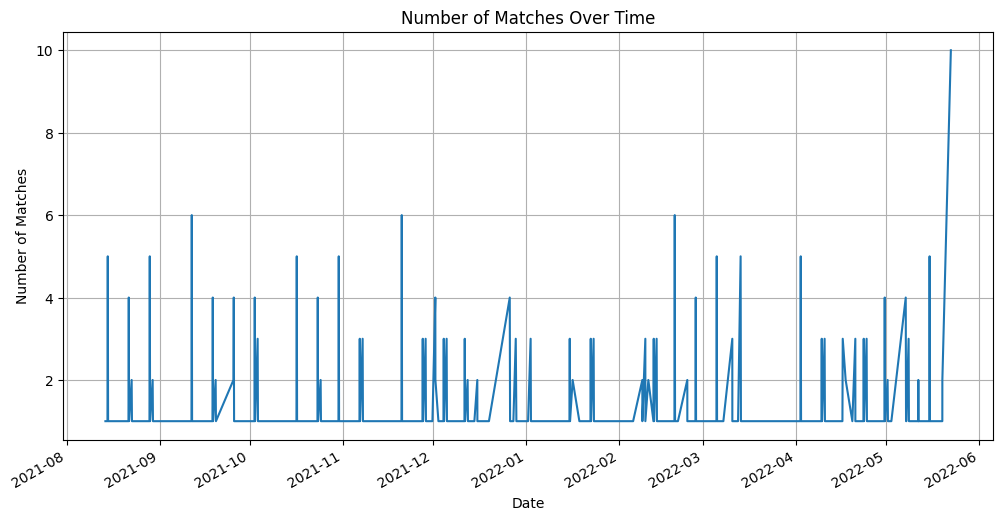

Matches per hour of the day:
Hour
12     31
14     68
15    119
16     39
17     31
18      1
19     45
20     46
Name: count, dtype: int64


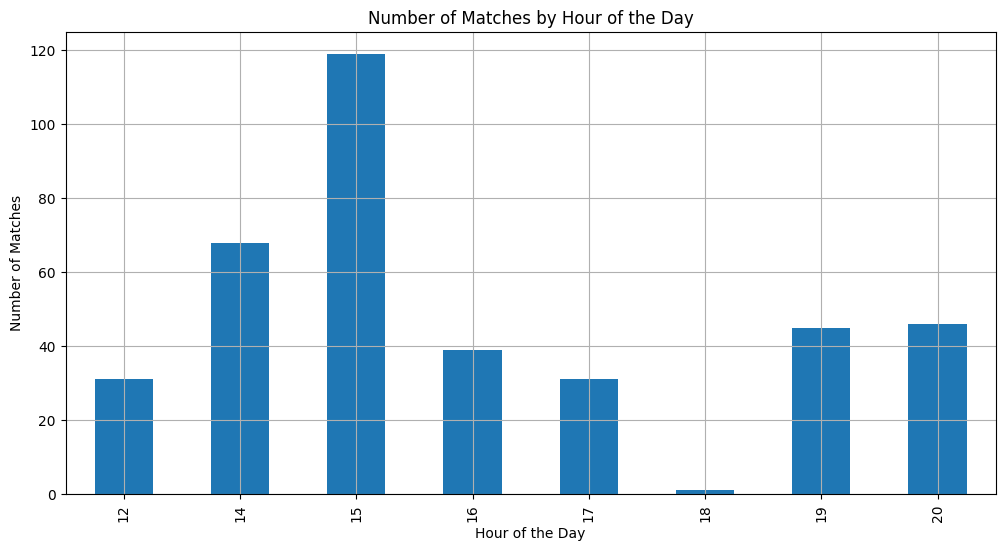

In [74]:
print("Season 2021-2022:")
Home_df_22 = Home_df_22.copy()
Home_df_22['Month'] = Home_df_22['DateTime'].dt.to_period('M')
Home_df_22['Year'] = Home_df_22['DateTime'].dt.year
matches_per_month = Home_df_22.groupby('Month').size().reset_index(name='Matches') # type: ignore
print("Matches per month:")
print(matches_per_month)

matches_per_day = Home_df_22['Day'].value_counts().sort_index()
print("Matches per day of the week:")
print(matches_per_day)

plt.figure(figsize=(12, 6))
Home_df_22.groupby('DateTime').size().plot()
plt.title('Number of Matches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

Home_df_22['Hour'] = Home_df_22['DateTime'].dt.hour
matches_per_hour = Home_df_22['Hour'].value_counts().sort_index()
print("Matches per hour of the day:")
print(matches_per_hour)

plt.figure(figsize=(12, 6))
matches_per_hour.plot(kind='bar')
plt.title('Number of Matches by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()


8. Do a referee analysis. What were the home win counts and away win counts under each referee?

In [75]:
print('Season 2020-21\n')
games_conducted = Home_df_21.groupby('Referee').size().reset_index(name='Games_Conducted') # type: ignore
home_wins = Home_df_21[Home_df_21['Result'] == 'W'].groupby('Referee').size().reset_index(name='Home_Wins') # type: ignore
away_wins = Away_df_21[Away_df_21['Result'] == 'W'].groupby('Referee').size().reset_index(name='Away_Wins') # type: ignore
draws = Home_df_21[Home_df_21['Result'] == 'D'].groupby('Referee').size().reset_index(name='Draws') # type: ignore

referee_stats = games_conducted.merge(home_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(away_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(draws, on='Referee', how='left')

referee_stats = referee_stats.fillna(0)
referee_stats = referee_stats.astype({'Games_Conducted': int, 'Home_Wins': int, 'Away_Wins': int, 'Draws': int})
referee_stats.sort_values(by='Games_Conducted', inplace=True, ascending=False)

print(referee_stats.to_string(index=False))


Season 2020-21

        Referee  Games_Conducted  Home_Wins  Away_Wins  Draws
 Anthony Taylor               28          7         12      9
 Michael Oliver               28          9         16      3
Martin Atkinson               26         10         12      4
 Andre Marriner               25          7         10      8
  Jonathan Moss               25         10         10      5
      Mike Dean               25          9          9      7
   Kevin Friend               25         10         11      4
   Craig Pawson               23          8          8      7
 Stuart Attwell               23          9          8      6
 Chris Kavanagh               22         10         11      1
    David Coote               21         10         10      1
   Paul Tierney               21          5          7      9
    Andy Madley               16          6          5      5
   Peter Bankes               16          6          6      4
   Graham Scott               13          6          5

In [76]:
print('Season 2021-22\n')
games_conducted = Home_df_22.groupby('Referee').size().reset_index(name='Games_Conducted') # type: ignore
home_wins = Home_df_22[Home_df_22['Result'] == 'W'].groupby('Referee').size().reset_index(name='Home_Wins') # type: ignore
away_wins = Away_df_22[Away_df_22['Result'] == 'W'].groupby('Referee').size().reset_index(name='Away_Wins') # type: ignore
draws = Home_df_22[Home_df_22['Result'] == 'D'].groupby('Referee').size().reset_index(name='Draws') # type: ignore

referee_stats = games_conducted.merge(home_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(away_wins, on='Referee', how='left')
referee_stats = referee_stats.merge(draws, on='Referee', how='left')

referee_stats = referee_stats.fillna(0)
referee_stats = referee_stats.astype({'Games_Conducted': int, 'Home_Wins': int, 'Away_Wins': int, 'Draws': int})
referee_stats.sort_values(by='Games_Conducted', inplace=True, ascending=False)

print(referee_stats.to_string(index=False))

Season 2021-22

          Referee  Games_Conducted  Home_Wins  Away_Wins  Draws
   Anthony Taylor               28         12          7      9
     Paul Tierney               27         10         10      7
     Craig Pawson               26         13          9      4
        Mike Dean               26          9          9      8
   Michael Oliver               26         14          7      5
  Martin Atkinson               26         14          8      4
    Jonathan Moss               25         16          6      3
   Stuart Attwell               20         12          4      4
      David Coote               20          5          8      7
   Andre Marriner               19          5         11      3
     Kevin Friend               18          6          9      3
   Chris Kavanagh               18          6          6      6
      Andy Madley               16         10          4      2
   Darren England               15          7          4      4
     Simon Hooper       

9. Do a captain analysis. Which capatins has more wins under them? Visualize the top 10 captains.

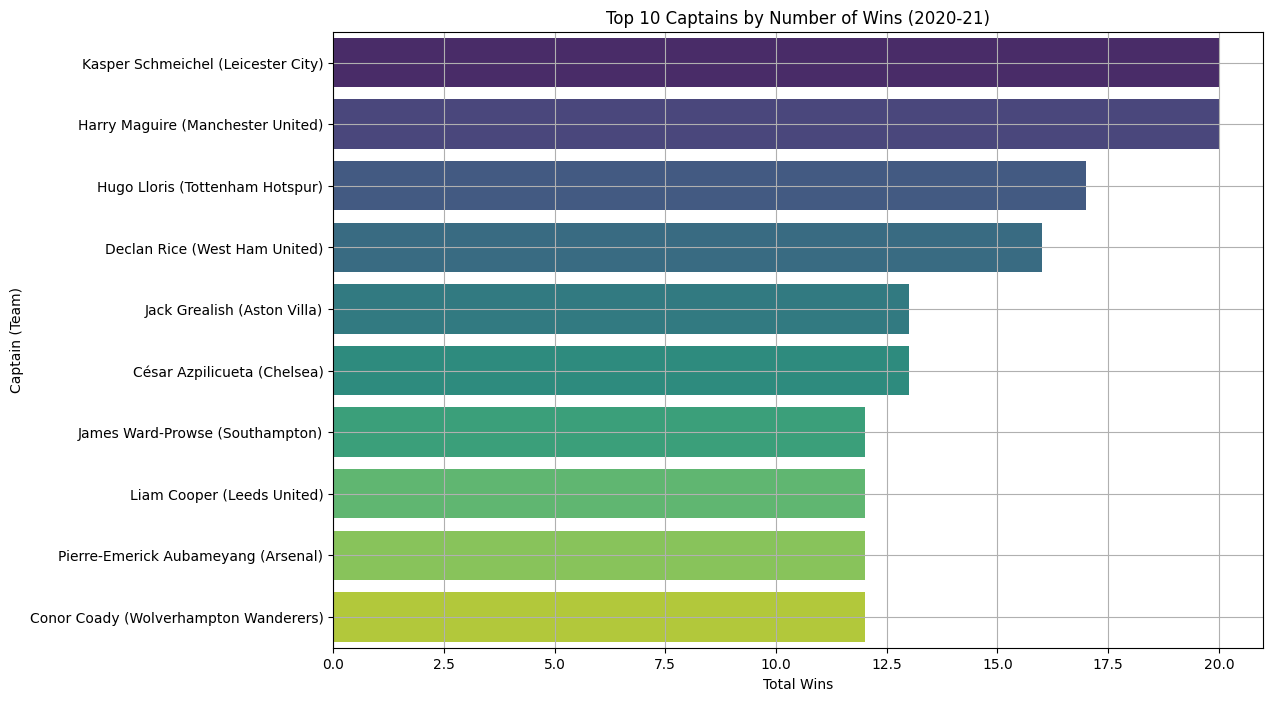

In [77]:
home_wins_captain = Home_df_21[Home_df_21['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
away_wins_captain = Away_df_21[Away_df_21['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
total_wins_captain = home_wins_captain.merge(away_wins_captain, on=['Captain_Ref', 'Ref_Team'], how='outer', suffixes=('_Home', '_Away'))
total_wins_captain['Total_Wins'] = total_wins_captain['Wins_Home'].fillna(0) + total_wins_captain['Wins_Away'].fillna(0)
total_wins_captain['Captain_Team'] = total_wins_captain['Captain_Ref'] + " (" + total_wins_captain['Ref_Team'] + ")"
top_10_captains = total_wins_captain.sort_values(by='Total_Wins', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Wins', y='Captain_Team', data=top_10_captains, palette='viridis',hue='Captain_Team')
plt.title('Top 10 Captains by Number of Wins (2020-21)')
plt.xlabel('Total Wins')
plt.ylabel('Captain (Team)')
plt.grid(True)
plt.show()

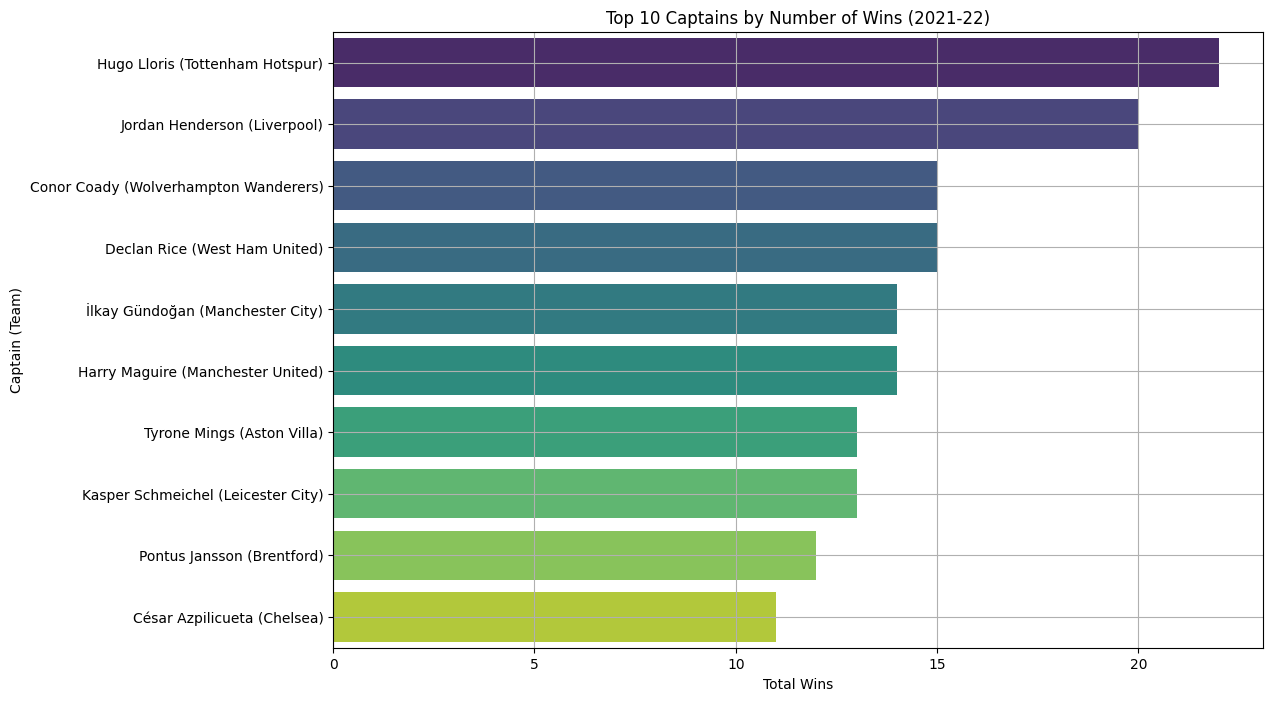

In [78]:
home_wins_captain = Home_df_22[Home_df_22['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
away_wins_captain = Away_df_22[Away_df_22['Result'] == 'W'].groupby(['Captain_Ref', 'Ref_Team']).size().reset_index(name='Wins') # type: ignore
total_wins_captain = home_wins_captain.merge(away_wins_captain, on=['Captain_Ref', 'Ref_Team'], how='outer', suffixes=('_Home', '_Away'))
total_wins_captain['Total_Wins'] = total_wins_captain['Wins_Home'].fillna(0) + total_wins_captain['Wins_Away'].fillna(0)
total_wins_captain['Captain_Team'] = total_wins_captain['Captain_Ref'] + " (" + total_wins_captain['Ref_Team'] + ")"
top_10_captains = total_wins_captain.sort_values(by='Total_Wins', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Wins', y='Captain_Team', data=top_10_captains, palette='viridis',hue='Captain_Team')
plt.title('Top 10 Captains by Number of Wins (2021-22)')
plt.xlabel('Total Wins')
plt.ylabel('Captain (Team)')
plt.grid(True)
plt.show()

10.  What is the accuracy of each teams(Shots on Target/Shots)? Find the average accuracy and find the most accurate team.

In [83]:
print('Season 2020-21')
sot_21=df_21[['Ref_Team','Shots_Ref','Shots_On_Target_Ref']].copy()
sot_21['Shot_Accuracy']=sot_21['Shots_On_Target_Ref']/sot_21['Shots_Ref']
shot_acc=sot_21.groupby('Ref_Team').agg(Average_Shot_Accuracy=('Shot_Accuracy','mean')).reset_index()
shot_acc.rename(columns={'Ref_Team':"Teams"},inplace=True)
shot_acc.sort_values(by='Average_Shot_Accuracy',ascending=False,inplace=True)
print(shot_acc.to_string(index=False))
acc=shot_acc['Teams'].iloc[0]
print("\nThe team with the most accuracy is",acc)

Season 2020-21
                   Teams  Average_Shot_Accuracy
            Leeds United               0.407455
       Tottenham Hotspur               0.389599
         Manchester City               0.385012
             Southampton               0.384038
          Crystal Palace               0.382963
          Leicester City               0.377432
       Manchester United               0.375311
                 Everton               0.366424
         West Ham United               0.360656
                 Chelsea               0.357641
             Aston Villa               0.342437
               Liverpool               0.341790
    West Bromwich Albion               0.341550
        Newcastle United               0.339194
                 Arsenal               0.332338
 Wolverhampton Wanderers               0.325457
                 Burnley               0.322860
Brighton and Hove Albion               0.310411
        Sheffield United               0.286326
                  Fulham 

In [82]:
print('Season 2021-22')
sot_22=df_22[['Ref_Team','Shots_Ref','Shots_On_Target_Ref']].copy()
sot_22['Shot_Accuracy']=sot_22['Shots_On_Target_Ref']/sot_22['Shots_Ref']
shot_acc=sot_22.groupby('Ref_Team').agg(Average_Shot_Accuracy=('Shot_Accuracy','mean')).reset_index()
shot_acc.rename(columns={'Ref_Team':"Teams"},inplace=True)
shot_acc.sort_values(by='Average_Shot_Accuracy',ascending=False,inplace=True)
print(shot_acc.to_string(index=False))
acc=shot_acc['Teams'].iloc[0]
print("\nThe team with the most accuracy is",acc)

Season 2021-22
                   Teams  Average_Shot_Accuracy
          Leicester City               0.383861
       Manchester United               0.380276
       Tottenham Hotspur               0.376932
 Wolverhampton Wanderers               0.364459
          Crystal Palace               0.359052
             Aston Villa               0.344617
               Liverpool               0.344150
             Southampton               0.338860
                 Chelsea               0.335163
         Manchester City               0.333142
                 Arsenal               0.328977
               Brentford               0.326429
Brighton and Hove Albion               0.321901
         West Ham United               0.320530
        Newcastle United               0.312634
                 Watford               0.302585
            Leeds United               0.300541
                 Everton               0.299983
                 Burnley               0.287187
            Norwich City 

<h1> Conclusion </h1>

The project helped in improving Data Analysis skills. Here, python and it's important libraries for data analytics(Pandas, Seaborn, Matplotlib) were used. The project helped in analysing various meaningful informations from the raw dataset. To be specific, the project helps in analysing and representing graphically, the different information associated with the English Premier League. Some important concepts of Pandas were implemented like groupby, aggregate, pivot_table etc. The simpler concepts were also repeatedly used (sort, rename, slicing etc. ). The project helped to understand the step-by-step approach that is to be taken when a large dataset is provided for analysis. Moreover, the project helped to increase knowledge on difficult topics by studying various concepts thoroughly and bringing it into application. 